In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import os,sys
import helper_scripts as hs
from helper_scripts import effect_plot as EP

from helper_scripts import DimensionalReduction 

import yaml

Populating the interactive namespace from numpy and matplotlib


/Users/silas/miniconda3/lib/python3.6/site-packages/scikit_bio-0.5.5-py3.6-macosx-10.7-x86_64.egg/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


In [2]:
%run warm_figure_scripts.py

In [4]:


os.chdir('../data/Sequencing_C/')


config= yaml.load(open('config_analysis.yaml'))
Comparisons= list(config['Comparisons'].keys())

os.chdir('./Analysis/Analysis')




/Users/silas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [5]:
hs.plotting.plotting_Setup()


output_folder="../Figures"



os.makedirs(output_folder,exist_ok=True)
SAVEPLOT=False



plt_params=dict(figurefolder=output_folder,
    formats=['.svg','.pdf'],
    SAVEPLOT=SAVEPLOT)               ### SAVEPLOT

## PCA Warm + Warm transplanted


In [6]:
data=pd.read_csv('data.tsv',index_col=0,sep='\t')
metadata= load_metadata()
rename_metadata(data,metadata)


from helper_scripts import MetaTable

from skbio.stats.composition import clr,multiplicative_replacement

data= data.loc[:,~(data<=1).all()]
data= pd.DataFrame(clr(multiplicative_replacement(data)), columns=data.columns,index= data.index)


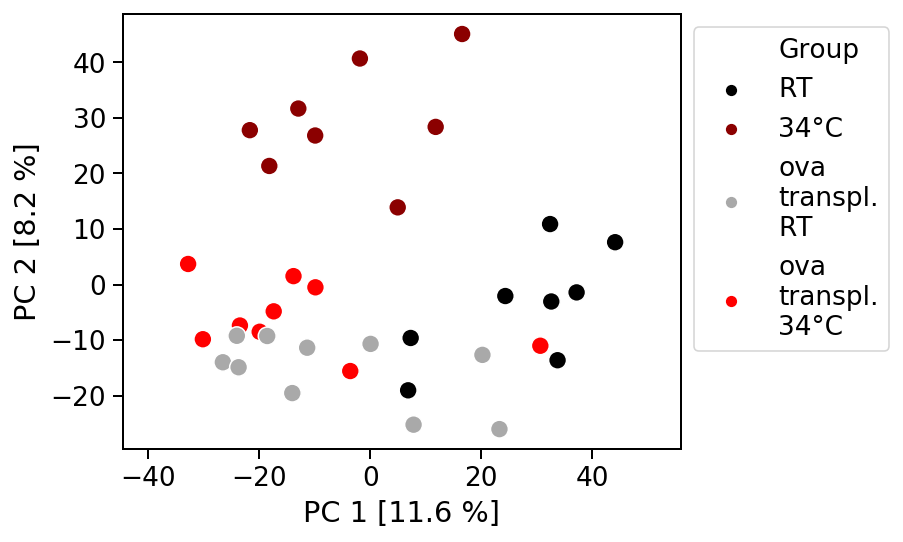

In [8]:

order=[ 'RT', '34°C', 'ova\ntranspl.\nRT','ova\ntranspl.\n34°C']

group_colors= ['k','darkred','darkgrey','red']
data,metadata = take_subset(data,metadata,order)


f= plt.figure(figsize=(5,4))

DR= DimensionalReduction.DimensionalReduction(data)
ax =DR.plot_Components_2D(hue=metadata.Group,hue_order=order,palette= group_colors,s=80)
ax.axis('equal')
ax.legend(bbox_to_anchor=(1,1))


hs.plotting.saveplot('PCA_female_Transpl',**plt_params)